##**EDA2**

#1. Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

Load dataset

In [2]:
df = pd.read_csv("adult_with_headers.csv", header=0, na_values=' ?')

Basic exploration

In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  3

Handle missing values

In [8]:
df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)

Clean column names: remove spaces, make lowercase, replace - with _

In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_')

Check cleaned column names

In [11]:
print(df.columns.tolist())

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


In [16]:
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'sex', ...]

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'sex',
 Ellipsis]

In [18]:
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
df[num_cols] = df[num_cols].astype(float)

Check Standard Scaled Data

In [21]:
print(df_std_scaled[num_cols].head())

        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.042796 -1.062722       1.128918      0.146092     -0.218586   
1  0.880288 -1.007871       1.128918     -0.147445     -0.218586   
2 -0.033340  0.244693      -0.439738     -0.147445     -0.218586   
3  1.108695  0.425240      -1.224066     -0.147445     -0.218586   
4 -0.794697  1.406658       1.128918     -0.147445     -0.218586   

   hours_per_week  
0       -0.077734  
1       -2.331531  
2       -0.077734  
3       -0.077734  
4       -0.077734  


Apply Standard Scaling

In [19]:
scaler_std = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_cols] = scaler_std.fit_transform(df[num_cols])

Apply Min-Max Scaling

In [20]:
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_cols] = scaler_minmax.fit_transform(df[num_cols])

check Min-Max Scaled Data

In [22]:
print(df_minmax_scaled[num_cols].head())

        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.043338       0.800000       0.02174           0.0   
1  0.452055  0.047277       0.800000       0.00000           0.0   
2  0.287671  0.137244       0.533333       0.00000           0.0   
3  0.493151  0.150212       0.400000       0.00000           0.0   
4  0.150685  0.220703       0.800000       0.00000           0.0   

   hours_per_week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959  


##2. Encoding Techniques


In [23]:
from sklearn.preprocessing import LabelEncoder

One-Hot Encode columns with < 5 categories (e.g., 'sex', 'race')

In [24]:
df_encoded = pd.get_dummies(df, columns=['sex', 'race'], drop_first=True)

Clean column names again


In [28]:
df_encoded.columns = df_encoded.columns.str.strip().str.lower().str.replace('-', '_')

In [29]:
label_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']

Label Encoding for high-cardinality categoricals

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [31]:
print(df_encoded.head())

    age  workclass    fnlwgt  education  education_num  marital_status  \
0  39.0          5   77516.0          9           13.0               4   
1  50.0          4   83311.0          9           13.0               2   
2  38.0          2  215646.0         11            9.0               0   
3  53.0          2  234721.0          1            7.0               2   
4  28.0          2  338409.0          9           13.0               2   

   occupation  relationship  capital_gain  capital_loss  hours_per_week  \
0           0             1        2174.0           0.0            40.0   
1           3             0           0.0           0.0            13.0   
2           5             1           0.0           0.0            40.0   
3           5             0           0.0           0.0            40.0   
4           9             5           0.0           0.0            40.0   

   native_country  income  sex_ male  race_ asian_pac_islander  race_ black  \
0              38   <=50K

#3. Feature Engineering


Feature 1: total_capital

In [34]:
df_encoded['total_capital'] = df_encoded['capital_gain'] - df_encoded['capital_loss']

Feature 2: age_group

In [35]:
df_encoded['age_group'] = pd.cut(df_encoded['age'],
                                 bins=[0, 25, 45, 65, 100],
                                 labels=['Young', 'Adult', 'Senior', 'Elder'])

Feature 3: log transformation for skewed capital_gain

In [36]:
df_encoded['log_capital_gain'] = np.log1p(df_encoded['capital_gain'])

View the new features


In [37]:
print(df_encoded[['total_capital', 'age_group', 'log_capital_gain']].head())

   total_capital age_group  log_capital_gain
0         2174.0     Adult          7.684784
1            0.0    Senior          0.000000
2            0.0     Adult          0.000000
3            0.0    Senior          0.000000
4            0.0     Adult          0.000000


#4. Feature Selection

In [44]:
!pip install ppscore

Correlation Matrix

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

Select only numeric columns

In [48]:
numeric_df = df_encoded.select_dtypes(include='number')

Correlation Heatmap

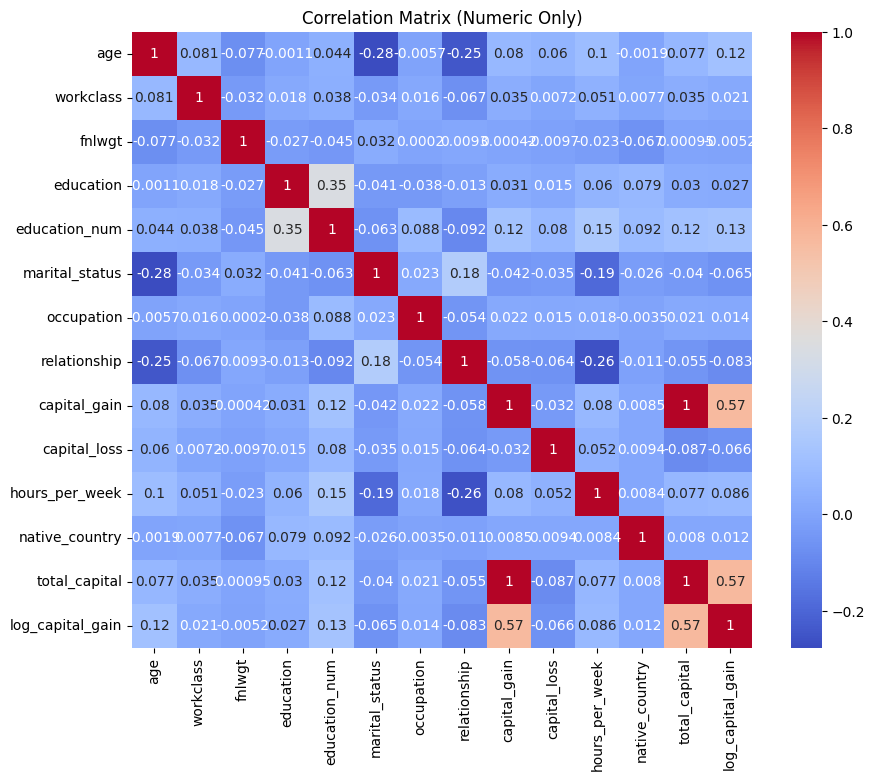

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Matrix (Numeric Only)")
plt.show()